In [1]:
import xarray as xr
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import os
from netCDF4 import Dataset
import h5py
from matplotlib import pyplot as plt
import wradlib as wrl

In [45]:
path = "../data/RYDL/2023/08/"
files = os.listdir(path)
files = [path + f for f in files]
files
test = xr.open_mfdataset(files)

In [46]:
test

<xarray.Dataset> Size: 35GB
Dimensions:  (time: 8928, y: 1100, x: 900)
Coordinates:
  * x        (x) float64 7kB -4.43e+05 -4.42e+05 -4.41e+05 ... 4.55e+05 4.56e+05
  * y        (y) float64 9kB -4.758e+06 -4.757e+06 ... -3.66e+06 -3.659e+06
    lat      (y, x) float64 8MB dask.array<chunksize=(1100, 900), meta=np.ndarray>
    lon      (y, x) float64 8MB dask.array<chunksize=(1100, 900), meta=np.ndarray>
  * time     (time) datetime64[ns] 71kB 2023-08-01 ... 2023-08-31T23:55:00
Data variables:
    crs      (time) int32 36kB -2147483647 -2147483647 ... -2147483647
    RR       (time, y, x) float32 35GB dask.array<chunksize=(1, 1100, 900), meta=np.ndarray>
Attributes:
    title:        RADKLIM - radar-based precipitation climatology
    institution:  Deutscher Wetterdienst (DWD)
    history:      Created at 2024-04-03 11:26:07.558942
    reference:    10.5676/DWD/RADKLIM_YW_V2017.002
    Conventions:  CF-1.6
    Author:       Harald Rybka, Katharina Lengfeld

In [100]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

map_proj = ccrs.Stereographic(
    true_scale_latitude=60.0, central_latitude=90.0, central_longitude=10.0
)

subset = test.isel(time = 0).RR
subset = subset[100:-100,100:-100]

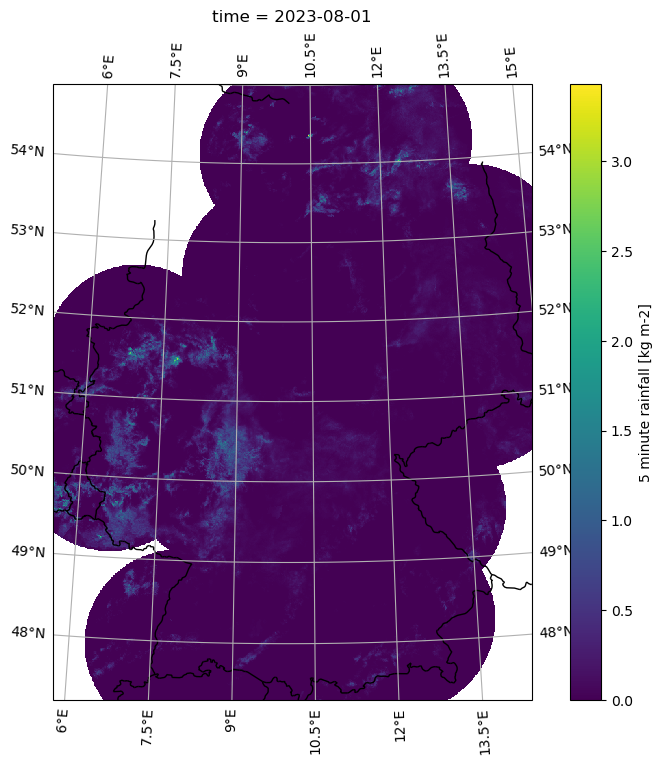

In [101]:
fig = plt.figure(figsize=(10, 8))
subset.plot(subplot_kws=dict(projection=map_proj))
ax = plt.gca()
ax.gridlines(draw_labels=True, y_inline=False)
ax.add_feature(cfeature.BORDERS)

In [28]:
radolan_grid_xy = wrl.georef.get_radolan_grid(900, 900, wgs84=True)
x = [radolan_grid_xy[0,0,0], radolan_grid_xy[0,-1,0]]
y = [radolan_grid_xy[0,0,1], radolan_grid_xy[-1,0,1]]
print(x,y)

[3.588929950917963, 14.608702502626649] [46.95258041119031, 54.57904570041962]


In [29]:
radolan_grid_xy = wrl.georef.get_radolan_grid(1100, 900, wgs84=True)
x = [radolan_grid_xy[0,0,0], radolan_grid_xy[0,-1,0]]
y = [radolan_grid_xy[0,0,1], radolan_grid_xy[-1,0,1]]
print(x,y)

[4.675934176579067, 15.468175240935931] [46.19287861255967, 55.53947933382205]
